In [ ]:
#| hide
from nanograd.core import *

# nanograd
## Welcome to nanograd :)
> This is a mock library implementing [`micrograd`](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ) by [Andrej Karpathy](https://karpathy.ai/). 

## Install

```
git clone https://github.com/vempaliakhil96/nanograd.git && cd nanaograd
pip install .
```

## How to use

In [ ]:
from nanograd.nn import MLP
import numpy as np

## Let's generate a random dataset

In [ ]:
def generate_dataset(num_samples):
    X = np.random.rand(num_samples, 2)  # Two input features (random values between 0 and 1)
    Y = np.zeros(num_samples, dtype=int)  # Output labels initialized as zeros

    # Generate labels based on the region defined by X1 and X2
    for i in range(num_samples):
        if X[i, 0] + X[i, 1] > 1:
            Y[i] = 1  # Class 1
        else:
            Y[i] = 0  # Class 0

    return X, Y

X, Y = generate_dataset(100)

## Initialise MLP

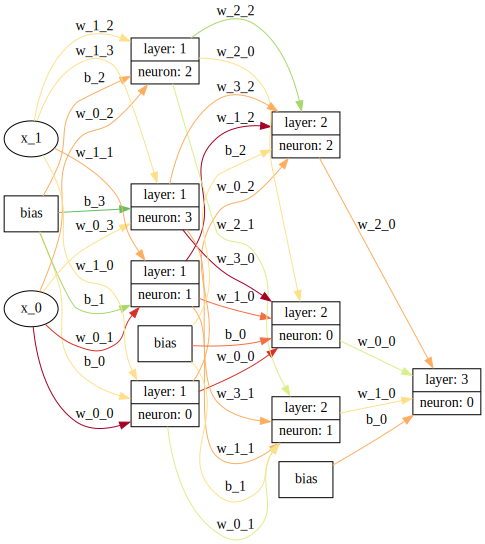

In [ ]:
model = MLP(2, [4,3,1])
model.draw_nn()

## Training loop

In [ ]:
def calc_loss_and_accuracy(model, X, Y):
    y_preds = [model(x)[0] for x in X]
    loss = sum([(y_preds[i] - Y[i])**2 for i in range(len(Y))])/len(Y) # MSE
    y_preds = [1 if y_preds[i].data > 0.5 else 0 for i in range(len(Y))]
    accuracy = sum([1 if y_preds[i] == Y[i] else 0 for i in range(len(Y))])/len(Y)
    return loss, accuracy
calc_loss_and_accuracy(model, X, Y)

(Value(data=1.03e+00, grad=0.00e+00, label=), 0.46)

In [ ]:
for i in range(1000):
    
    # forward pass
    loss, accuracy = calc_loss_and_accuracy(model, X, Y)
    
    
    # backward pass
    model.zero_grad()
    loss.backward()

    # update weights
    for p in model.parameters():
        p.data += -0.1 * p.grad
    
    if i % 100 == 0:
        print(f"Loss at epoch {i:.3f}: {loss.data:.3f} | Accuracy: {accuracy:.3f}")

Loss at epoch 0.000: 1.034 | Accuracy: 0.460
Loss at epoch 100.000: 0.233 | Accuracy: 0.680
Loss at epoch 200.000: 0.153 | Accuracy: 0.810
Loss at epoch 300.000: 0.098 | Accuracy: 0.890
Loss at epoch 400.000: 0.075 | Accuracy: 0.970
Loss at epoch 500.000: 0.066 | Accuracy: 0.970
Loss at epoch 600.000: 0.059 | Accuracy: 0.980
Loss at epoch 700.000: 0.054 | Accuracy: 0.980
Loss at epoch 800.000: 0.049 | Accuracy: 0.980
Loss at epoch 900.000: 0.045 | Accuracy: 0.980
